# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Nestor Canales / Adriana Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [14]:
# Solution
import requests
response1 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39552DA/json/1922/2021")
status_code1 = response1.status_code
status_code1 # Si tiene un valor de 200 significa que no hay problemas en conectar con el server.

200

In [16]:
response1.json()

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

In [25]:
response2 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01728AM/json/2022/2023") # La data de 2023 se encuentra incompleta, por eso la obvio.
status_code2 = response2.status_code
status_code2

200

In [26]:
response2.json()

{'config': {'title': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas)',
  'series': [{'name': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Ene.2022', 'values': ['2.76349432316665']},
  {'name': 'Feb.2022', 'values': ['4.70291294109833']},
  {'name': 'Mar.2022', 'values': ['3.83830111073661']},
  {'name': 'Abr.2022', 'values': ['4.00212973664761']},
  {'name': 'May.2022', 'values': ['2.61019336189649']},
  {'name': 'Jun.2022', 'values': ['3.47478980814159']},
  {'name': 'Jul.2022', 'values': ['1.8025721283913']},
  {'name': 'Ago.2022', 'values': ['1.97427453328511']},
  {'name': 'Sep.2022', 'values': ['2.13997812996818']},
  {'name': 'Oct.2022', 'values': ['2.3335148356285']},
  {'name': 'Nov.2022', 'values': ['2.12160068474319']},
  {'name': 'Dic.2022', 'values': ['1.04248993191112']}]}

In [34]:
# Obtén los datos JSON de ambas respuestas
data1 = response1.json()
data2 = response2.json()

# Calcula el promedio de la variación porcentual del PBI en response2
variation_values_2022 = [float(period["values"][0]) for period in data2["periods"]]
average_variation_2022 = sum(variation_values_2022) / len(variation_values_2022)

# Crea una nueva estructura de datos llamada data3 basada en data1 y agrega el promedio para el año 2022
data3 = {
    "config": data1["config"],
    "periods": data1["periods"] + [{"name": "2022", "values": [str(average_variation_2022)]}]
}

data3

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

In [36]:
# Añade la estimación para el año 2023 en data4 (Ese valor se encuentra en este link: https://www.bcrp.gob.pe/docs/Publicaciones/Reporte-Inflacion/2023/diciembre/reporte-de-inflacion-diciembre-2023-presentacion.pdf)
data4 = {
    "config": data3["config"],
    "periods": data3["periods"] + [{"name": "2023", "values": ["-0.5"]}]
}

# Muestra la estructura de datos resultante llamada data4
data4

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

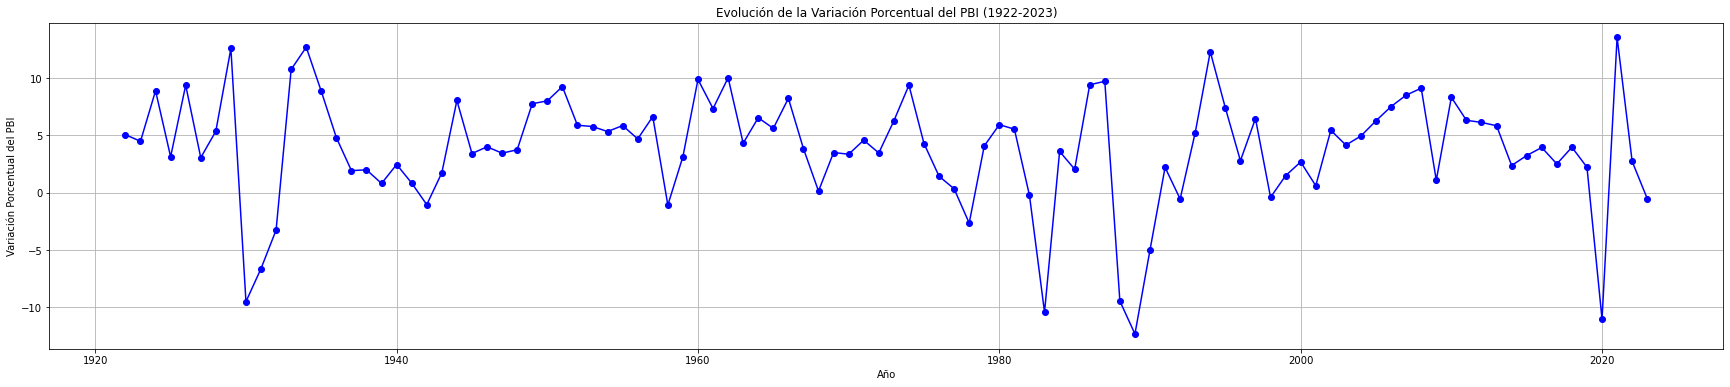

In [40]:
import matplotlib.pyplot as plt
# Crea listas para almacenar los años y las variaciones porcentuales
years = [int(period["name"]) for period in data4["periods"]]
variations = [float(period["values"][0]) for period in data4["periods"]]

# Grafica la evolución de la variación porcentual a lo largo de los años
plt.figure(figsize=(30, 6))
plt.plot(years, variations, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Variación Porcentual del PBI (1922-2023)')
plt.xlabel('Año')
plt.ylabel('Variación Porcentual del PBI')
plt.grid(True)
plt.show()

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [ ]:
# Solution

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [ ]:
# Solution